In [1]:
!pip install pyspark py4j

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 24 kB/s 
     |████████████████████████████████| 200 kB 47.9 MB/s 
     |████████████████████████████████| 199 kB 12.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=a233dcc6b68f7d32180e78bac542ff96a94fe6f78c0052b9bdbcd3d936643bbe
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName("twitter_pyspark").getOrCreate()

In [4]:
df = spark.read.csv("/content/newtweets.csv", header=True, inferSchema=True)

In [5]:
df.show()

+--------------------+--------------------+--------------------+--------------------+---------+--------------------+------------+-------------+
|                 _c0|                Date|                User|               Tweet|followers|            Location|verification|tweets_posted|
+--------------------+--------------------+--------------------+--------------------+---------+--------------------+------------+-------------+
|                   0|2022-10-27 23:39:...|        CancerCanuck|A good cancer res...|     null|                null|        null|         null|
|#ayacsm #cancer #...|                1817|   Kingston, Ontario|               False|     4709|                null|        null|         null|
|                   1|2022-10-27 23:33:...|          TaeeDivine|#Libra #Aries #Ca...|     null|                null|        null|         null|
|Continue working ...|                 206|                null|               False|      466|                null|        null|       

In [54]:
#df.registerTempTable("tweetsc")
#data = spark.sql(f''' SELECT Tweet from tweetsc WHERE TWEET IS NOT NULL''').write.csv("/content/tweets1.csv")


In [6]:
df.count()

550483

In [7]:
df1=df.select('Date', 'User','Tweet','followers','verification','tweets_posted')

In [8]:
df2=df1.dropna()

In [9]:
df2.show()

+--------------------+---------------+--------------------+---------+------------+-------------+
|                Date|           User|               Tweet|followers|verification|tweets_posted|
+--------------------+---------------+--------------------+---------+------------+-------------+
|2022-10-27 23:16:...|pikesley_ebooks|Patrol cover-vers...|       62|       False|        75755|
|2022-10-27 23:12:...|     BridgeGap1|@TCLChalk @Southl...|      641|       False|         3288|
|2022-10-27 23:08:...|   BonitaMelvin|@BonitaMelvin #co...|      144|       False|          442|
|2022-10-27 23:07:...|   MedTechStrat|Water vapor techn...|     3844|       False|         5612|
|2022-10-27 23:00:...|     5tephanieM|@KizzyPhD I don't...|      324|       False|         7416|
|2022-10-27 22:53:...| icecreamofhour|The ice cream for...|        2|       False|         1875|
|2022-10-27 22:34:...|  NewFoundWings|I feel as though ...|      734|       False|        21487|
|2022-10-27 22:34:...|    Kabl

In [10]:
df2.count()

202701

In [11]:
from pyspark.sql.functions import lower, col
df2.select("*", lower(col('Tweet'))).show()

+--------------------+---------------+--------------------+---------+------------+-------------+--------------------+
|                Date|           User|               Tweet|followers|verification|tweets_posted|        lower(Tweet)|
+--------------------+---------------+--------------------+---------+------------+-------------+--------------------+
|2022-10-27 23:16:...|pikesley_ebooks|Patrol cover-vers...|       62|       False|        75755|patrol cover-vers...|
|2022-10-27 23:12:...|     BridgeGap1|@TCLChalk @Southl...|      641|       False|         3288|@tclchalk @southl...|
|2022-10-27 23:08:...|   BonitaMelvin|@BonitaMelvin #co...|      144|       False|          442|@bonitamelvin #co...|
|2022-10-27 23:07:...|   MedTechStrat|Water vapor techn...|     3844|       False|         5612|water vapor techn...|
|2022-10-27 23:00:...|     5tephanieM|@KizzyPhD I don't...|      324|       False|         7416|@kizzyphd i don't...|
|2022-10-27 22:53:...| icecreamofhour|The ice cream for.

In [12]:
df2.count()

202701

In [32]:
df2.createOrReplaceTempView("TWEETS")
df3=spark.sql(f'''SELECT Date, User, lower(Tweet) as tweets,followers,verification,tweets_posted,
CASE
WHEN lower(Tweet) like "%diabetes%" THEN 'Diabetes'
WHEN lower(Tweet) like "%cancer%" THEN 'Cancer'
WHEN lower(Tweet) like "%malaria%" THEN 'Malaria'
WHEN lower(Tweet) like "%dengue%" THEN 'Dengue'
WHEN lower(Tweet) like "%diarrhea%" THEN 'Diarrhea'
WHEN lower(Tweet) like "%tuberculosis%" THEN 'Tuberculosis'
WHEN lower(Tweet) like "%hiv%" THEN 'HIV'
WHEN lower(Tweet) like "%aids%" THEN 'AIDS'
WHEN lower(Tweet) like "%kidneycancer%" THEN 'KidneyCancer'
WHEN lower(Tweet) like "%asthma%" THEN 'Asthma'
WHEN lower(Tweet) like "%braincancer%" THEN 'BrainCancer'
WHEN lower(Tweet) like "%lungcancer%" THEN 'LungCancer'
WHEN lower(Tweet) like "%cold%" THEN 'Cold'
WHEN lower(Tweet) like "%fever%" THEN 'Fever'
ElSE 'Typhoid'
END AS Keys
FROM TWEETS''')


In [33]:
df3.show()

+--------------------+---------------+--------------------+---------+------------+-------------+------------+
|                Date|           User|              tweets|followers|verification|tweets_posted|        Keys|
+--------------------+---------------+--------------------+---------+------------+-------------+------------+
|2022-10-27 23:16:...|pikesley_ebooks|patrol cover-vers...|       62|       False|        75755|    Diabetes|
|2022-10-27 23:12:...|     BridgeGap1|@tclchalk @southl...|      641|       False|         3288|      Cancer|
|2022-10-27 23:08:...|   BonitaMelvin|@bonitamelvin #co...|      144|       False|          442|        Cold|
|2022-10-27 23:07:...|   MedTechStrat|water vapor techn...|     3844|       False|         5612|      Cancer|
|2022-10-27 23:00:...|     5tephanieM|@kizzyphd i don't...|      324|       False|         7416|        Cold|
|2022-10-27 22:53:...| icecreamofhour|the ice cream for...|        2|       False|         1875|        Cold|
|2022-10-2

Query 1 

In [34]:
#query1 Different Popular Diseases All Over World
df3.createOrReplaceTempView("TWEE")
df4=spark.sql(f'''SELECT Keys,COUNT(*) FROM TWEE group by Keys order by 2 DESC''').show()

+------------+--------+
|        Keys|count(1)|
+------------+--------+
|      Cancer|   94499|
|    Diabetes|   25940|
|         HIV|   21044|
|        Cold|   17318|
|      Asthma|   15018|
|     Malaria|    9283|
|        AIDS|    5701|
|     Typhoid|    4145|
|       Fever|    3890|
|      Dengue|    2029|
|    Diarrhea|    2006|
|Tuberculosis|    1828|
+------------+--------+



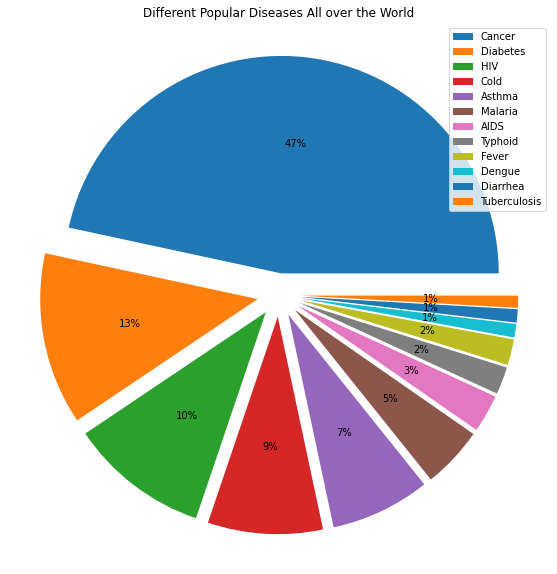

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
df3.createOrReplaceTempView("TWEE")
df4=spark.sql(f'''SELECT Keys,COUNT(*) as count FROM TWEE group by Keys order by 2 DESC''').toPandas()
plt.figure(figsize = (10,10))
myexplode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
fig = plt.pie(df4['count'],autopct='%1.0f%%',explode=myexplode)
plt.legend(df4['Keys'])
#plot = df4.plt.pie()
plt.title('Different Popular Diseases All over the World')
plt.show()

In [26]:
#query 2 top 10 users who tweeted more on diseases.(X)
spark.sql(f''' SELECT User, Keys,COUNT(User) as Ke FROM TWEE group by Keys, User order by 3 DESC''').show(10)

+---------------+-------+----+
|           User|   Keys|  Ke|
+---------------+-------+----+
|   AsthmaCauses| Asthma|5798|
|Astrology_4_You| Cancer|2911|
|    CancerTerms| Cancer|2451|
|MalariaReminder|Malaria|1683|
|CancerCancelled| Cancer|1508|
|   RtItOrBeatIt| Cancer|1412|
|  Mello08547321| Cancer|1085|
| BSBreastCancer| Cancer| 888|
|  Gab_Astrology| Cancer| 814|
| christheeagle1| Cancer| 760|
+---------------+-------+----+
only showing top 10 rows



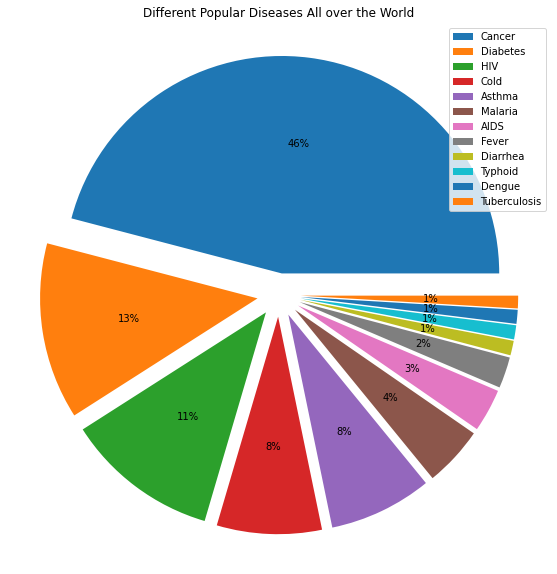

In [40]:
#query3 Popular Diseases in covid time
import seaborn as sns
import matplotlib.pyplot as plt
df5=spark.sql(f'''SELECT Keys,COUNT(*) as count FROM TWEE WHERE Date BETWEEN '2020-03-03 00:00:00+00' AND '2021-12-12 00:00:00+00:00' group by Keys order by 2 DESC''').toPandas()
plt.figure(figsize = (10,10))
myexplode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
fig = plt.pie(df5['count'],autopct='%1.0f%%',explode=myexplode)
plt.legend(df5['Keys'])
#plot = df4.plt.pie()
plt.title('Different Popular Diseases All over the World')
plt.show()

Compare query1 cold with query3 cold (barplot)


In [117]:
#query4 popular diseases in covid time
from pyspark.sql import functions as F
from pyspark.sql.functions import month,year
from pyspark.sql.functions import to_date
covid_time= df3.filter("date BETWEEN '2020-03-03' AND '2021-12-12'")

covid_time = covid_time.groupby('Keys').agg(F.count('Keys').alias('tweets'))

#sort the resulted data in descending order
covid_time = covid_time.sort(covid_time.tweets.desc())
covid_time.show()


+------------+------+
|        Keys|tweets|
+------------+------+
|      Cancer| 54474|
|    Diabetes| 15567|
|         HIV| 13524|
|        Cold|  9243|
|      Asthma|  9086|
|     Malaria|  5306|
|        AIDS|  3798|
|       Fever|  2746|
|    Diarrhea|  1287|
|     Typhoid|  1243|
|      Dengue|  1229|
|Tuberculosis|  1114|
+------------+------+



Bar plots

In [153]:
#query4 Tweets posted by Verified Users
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plot
data1=df3.filter(df3.verification==True)
#data1.show()
#data1.count()
verified_users = data1.groupby('User','followers','tweets_posted').agg((F.count('User').alias('tweets_')))
verified_users= verified_users.filter((verified_users.tweets_>=50))
verified_users = verified_users.sort(verified_users.tweets_.desc())
verified_users.show()
df6=verified_users.toPandas()
#df6['followers1']=df6['followers'].astype(str).astype(int)
#df6.info()
#df6.plot(x="tweets_", y=['tweets_posted'], kind="bar", figsize=(9, 8))


+---------------+---------+-------------+-------+
|           User|followers|tweets_posted|tweets_|
+---------------+---------+-------------+-------+
|         ViiVUS|     6947|         6383|    221|
|  JFreemanDaily|     5747|        21194|    121|
|     TedOkonCOA|     5313|        23587|    100|
|  LizHighleyman|    14328|        30822|     98|
|  LifeExtension|   151682|       233405|     73|
|     parthaskar|    43005|       141943|     71|
|   diaTribeNews|    20971|        20645|     55|
|NovoNordiskLive|    10901|         2908|     53|
|   GHTCoalition|     7420|        11037|     50|
+---------------+---------+-------------+-------+



In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
#Query3 Most Tweeted words
! pip install tweepy stylecloud -q

In [117]:
import stylecloud

stylecloud.gen_stylecloud(file_path='/content/tweets2.csv/part-00000-90f9b879-fbfa-46e0-bfb4-e1b8b093c05c-c000.csv',
                          icon_name='fab fa-twitter',
                          palette='colorbrewer.diverging.Spectral_11', #colorbrewer.qualitative.Paired_3', 
                          background_color='black',
                          gradient='horizontal',
                          stopwords = True ,
                          custom_stopwords = ['TCO','T','CO','HTTPS','RT','THE','IS','WITH','ON','HTTPS','AMP','i','and','me','my','myself','we','our',
                                              'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours','yourself', 'yourselves', 
                                              'he', 'him', 'his', 'himself','she', "she's",'her','hers', 'herself','it', "it's",'its', 'itself', 'they',
                                              'them', 'their','theirs','themselves', 'what', 'which', 'who','whom', 'this','that', "that'll", 'these',
                                              'those', 'am','is', 'are', 'was','were','be', 'been', 'being', 'have', 'has','had', 'having', 'do', 'does',
                                              'did','doing','a', 'an','the', 'and', 'but', 'if', 'or','because', 'as','until','while','of', 'at', 'by',
                                              'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below','to',
                                              'from', 'up','down','in','out', 'on', 'off', 'over', 'under','again', 'further','then','once', 'here','there',
                                              'when', 'where', 'why', 'how','all', 'any', 'both', 'each','few','more', 'most', 'other', 'some', 'such', 
                                              'nor', 'not', 'only', 'own', 'same', 'so','than','too','very','s', 't','can','will', 'just','don', "don't", 
                                              'should', "should've",'now', 'd','ll','m', 'o', 're','ve','y','ain', 'aren', "aren't",'couldn', "couldn't",
                                              'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",'haven', "haven't",'isn', "isn't",
                                              'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't",'shouldn', "shouldn't",
                                              'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn',"wouldn't",'for','no'])

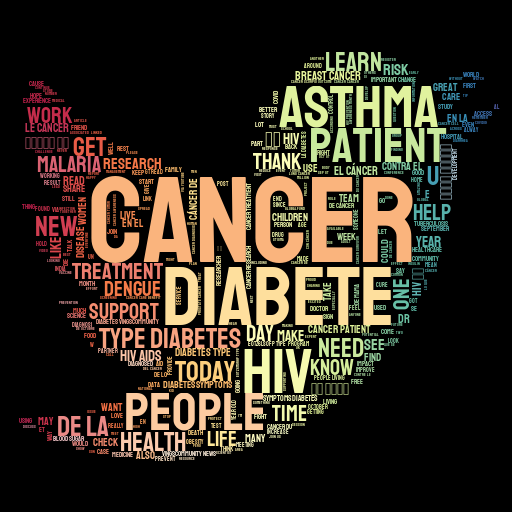

In [118]:
from IPython.display import Image
Image('stylecloud.png')

In [ ]:
#df6=df2.select(df.Tweet.cast("string").alias('text')).collect()
#[Row(text='2'), Row(text='5')]
#df6